<img src="DecisionTree.png" width="1200">
Generally, result with using Gini impurity and that with using Entropy are similar.
But classification error is not suitable to build decision tree because it is not comparably sensitive with probability of class in node.

Reference  
[Blog](http://darden.hatenablog.com/entry/2016/12/09/221630)  

In [53]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [54]:
import matplotlib.pyplot as plt
import numpy as np

#Define Gini inmurity
def gini(p):
    a = p
    b = 1-p
    return a*(1-a) + b*(1-b)

#Define Entropy
def entropy(p):
    a = p
    b = 1-p
    return -a*np.log2(a) - b*np.log2(b)

#Define Classification error
def error(p):
    a = p
    b = 1-p
    return 1 - np.max([a, b])

x = np.arange(0, 1, 0.01)
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

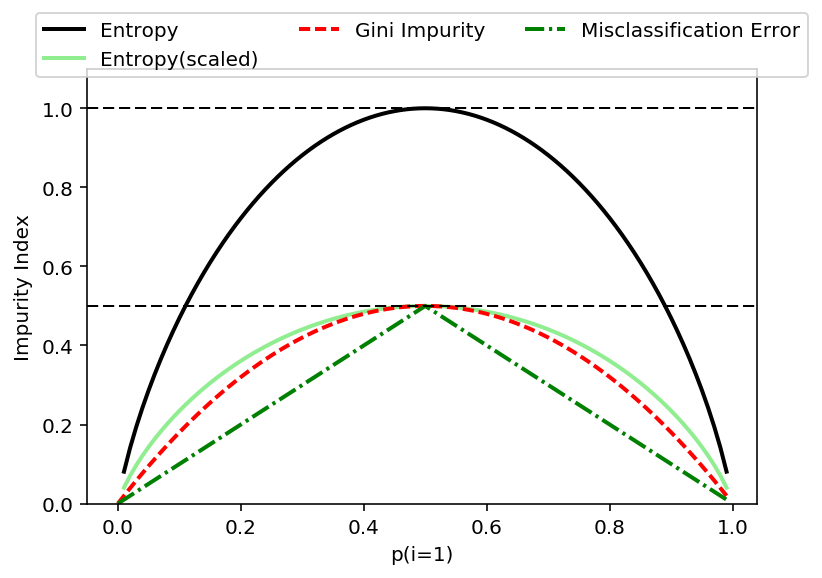

In [55]:
fig = plt.figure()

ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy(scaled)', 
                         'Gini Impurity', 'Misclassification Error'],
                         ['-','-','--','-.'],
                         ['black', 'lightgreen', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label = lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15),
         ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()


In [56]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

In [57]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [59]:
from Plot_decision_regions import PlotDecisionRegions 
plot_decision_regions = PlotDecisionRegions.plot_decision_regions

# Entropy 

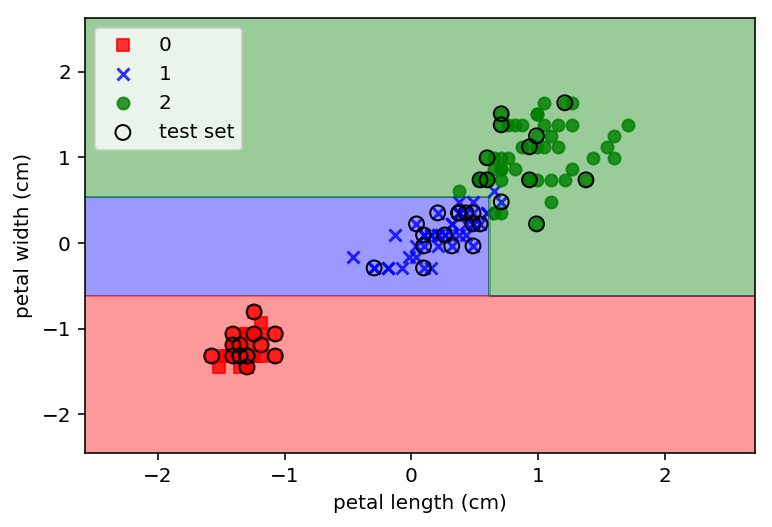

In [60]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

tree.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

In [69]:
print(np.round(tree.score(X_train_std, y_train),3)*100)
print(np.round(tree.score(X_test_std, y_test),3)*100)

98.1
97.8


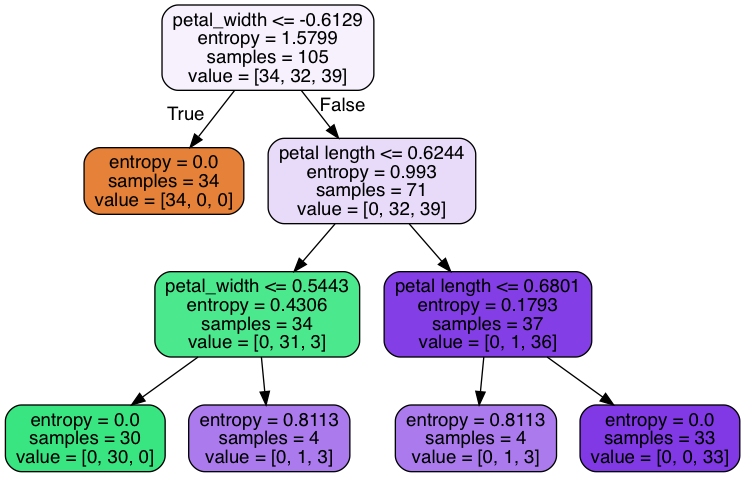

In [70]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True,rounded=True,feature_names=['petal length', 'petal_width'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())


# Gini Impurity

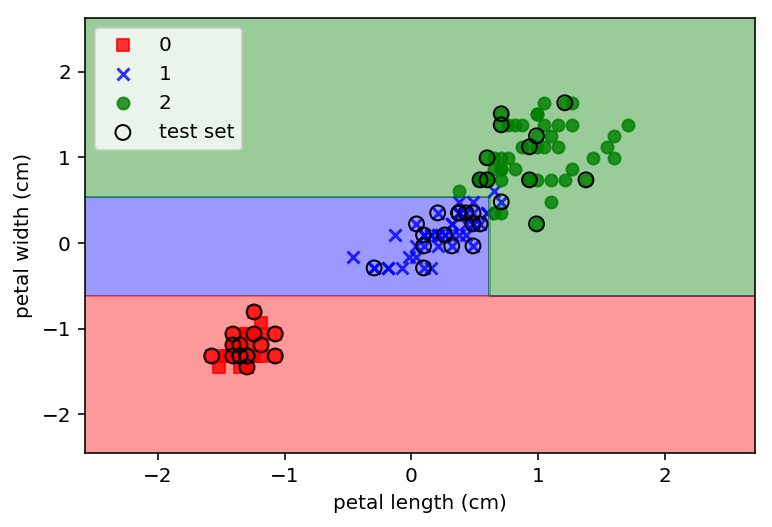

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

tree.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

In [72]:
print(np.round(tree.score(X_train_std, y_train),3)*100)
print(np.round(tree.score(X_test_std, y_test),3)*100)

98.1
97.8


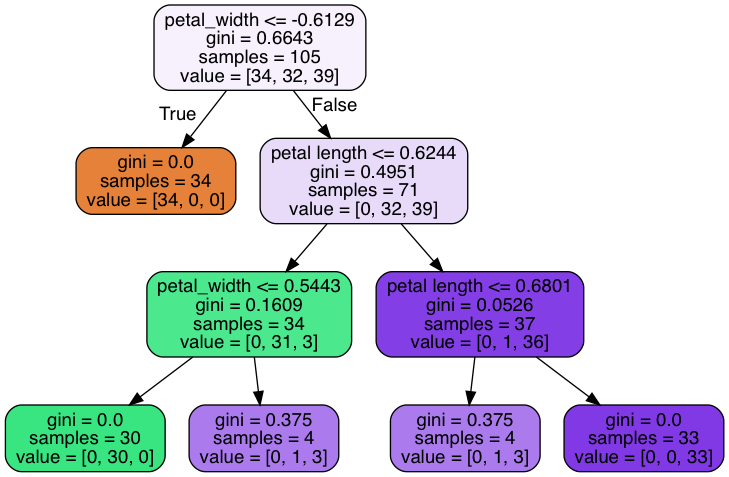

In [73]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True,rounded=True,feature_names=['petal length', 'petal_width'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())


# Max depth = 5

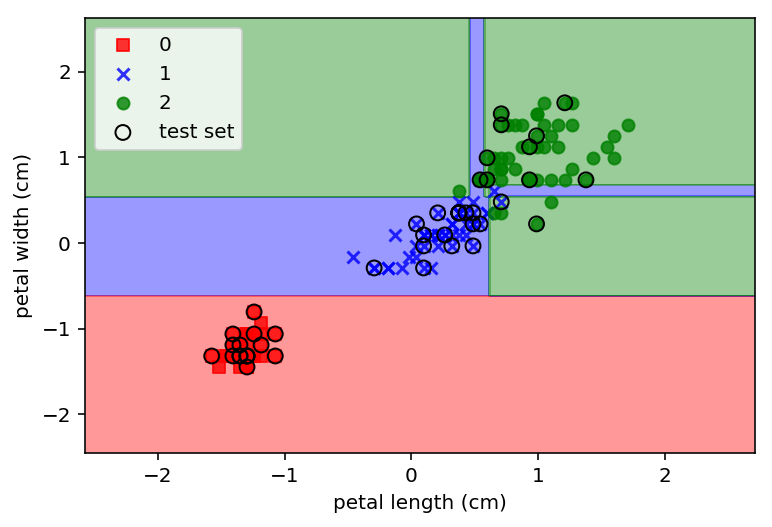

In [74]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

tree.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

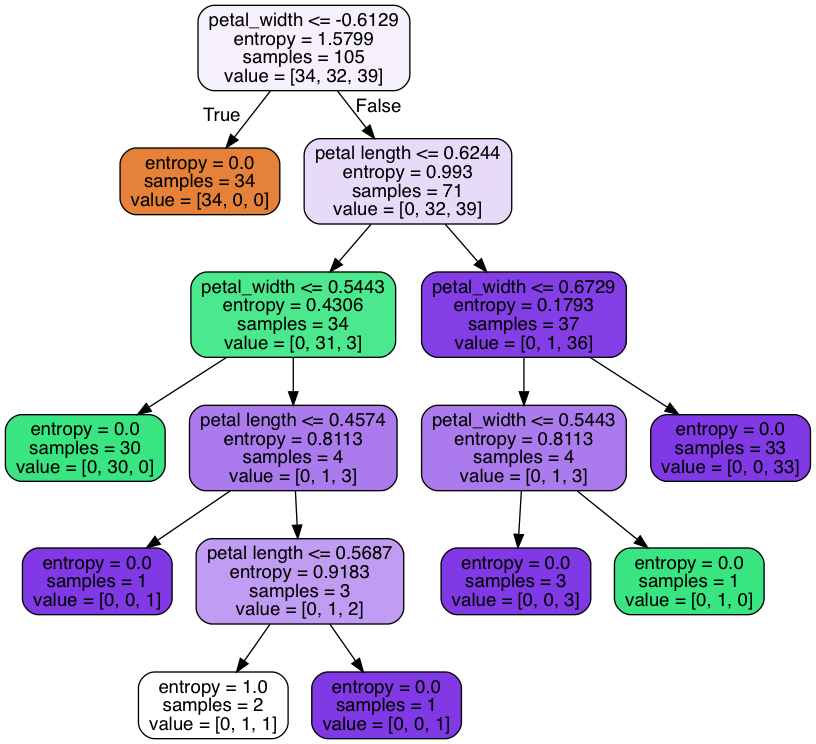

In [75]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True,rounded=True,feature_names=['petal length', 'petal_width'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())


In [76]:
print(np.round(tree.score(X_train_std, y_train),3)*100)
print(np.round(tree.score(X_test_std, y_test),3)*100)

99.0
95.6
